In [3]:
#Using the time-independent Schrödinger equation to find the eigenfunctions (wavefunctions) and energy levels of a 
#particle in an infinite potential well. 

#Firstly, import various libraries, which will later be used
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from scipy.integrate import quad

In [4]:
# define constants

hbar = (6.626 * 10**(-34)) / (2 * np.pi) #Planck's constant divided by 2Pi
m = 9.11 * 10**(-31) #Particle mass in Kg (in this case mass of an electron)
e = 1.6 * 10**(-19) #an electron volt

L = 10**(-10) # width of the potential well
A = np.sqrt(2 / L) # normalisation constant
w = 0.2 * 10**(-10) #width of the pertubation

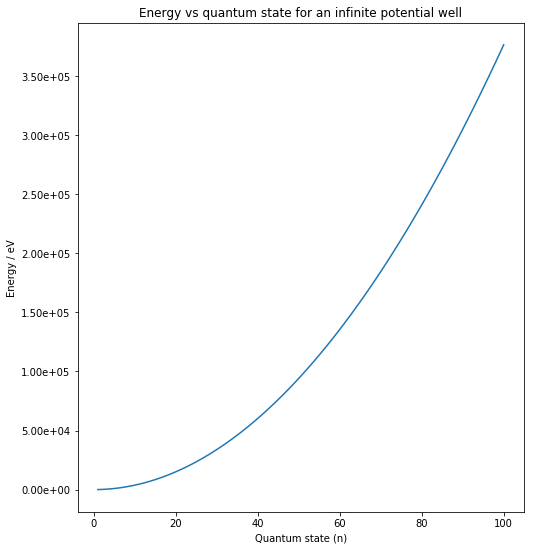

In [103]:
def energy(n):
    """
    Function to calculate the energy of the particle in an infinite 
    potential well in a particular quantum state
    
    Returns:
        energy : float
                 the energy of the particle
                 
    Parameter:
        n : integer
            the state of the wavefunction
    """
    
    energy = (n**2 * (np.pi)**2 * (hbar**2)) / (2 * m * L**2)
    return energy

def energy_spectrum(nmax):
    """
    Function to find energy of the system for various quantum states
    
    Returns:
        E : array
            the energies of systems up to the quantum state nmax
    
    Parameters:
        nmax : integer
               the highest quantum state. energies will be calculated up to this quantum state
    """
    
    E = []
    
    for i in range(1, nmax + 1):
        E = np.append(E, energy(i))
    
    return E

def plot_energy(nmax):
    """
    Function to plot energy against the quantum state
    
    Returns:
        a plot of energy against quantum state
        
    Parameters:
        nmax : integer
               the highest quantum state. energies will be calculated up to this quantum state
    """
    
    n = np.linspace(1, nmax, nmax) #array filled with quantum states
    
    #set the size of the figures
    fig = plt.figure(figsize = (8, 9))
    
    ax = fig.add_subplot(111)
    
        
    #general plot formatting
    ax.plot(n, energy_spectrum(nmax) / e)
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
    
    plt.xlabel('Quantum state (n)')
    plt.ylabel('Energy / eV')
    plt.title('Energy vs quantum state for an infinite potential well')
    return plt.show()

plot_energy(100)

In [94]:
def solution(n, x):
    """
    Function to calculate the value of the wavefunction at a given point in the infinite potential well
    
    Returns:
        psi : float
              the value of the wavefunction
        
    Parameters:
        n : integer
            the order of the wavefunction
            
        x : float
            the position of the particle in the infinite potential well
    """
    
    psi = A * np.sin((n * np.pi * x) / L) #the solution to the wavefunction in an infinite potential well
    return psi

In [8]:
def firstperturb(w, V, n):
    """
    Function to calulate the first-order perturbation in the energy of a particle in the infinite potential well
    
    Returns:
        perturb_eV : float
                     the first order perturbation in eV
    
    Parameters:
        w : float
            the width of the square perturbation
            
        V : float
            the magnitude of the square perturbation
            
        n : integer
            the principal quantum number
    """
    
    if w > L:
        print ("Perturbation width exceeds that of the infinite well. Reduce perturbation width.")
        
    else:
        def integrand(x):
            """
            Function to establish the integrand to be used when calculating the perturbation. Must do this 
            as cannot square the 'solution' function which is previously defined
            """
            
            return (A * np.sin((n * np.pi * x) / L)) * (np.conj(A * np.sin((n * np.pi * x) / L))) * V
        
        perturb_1 = quad(integrand, L/2 - w/2, L/2 + w/2)
        
        #the 'quad' function has two outputs: the integral and the estimated error in the integral
        #we only want the first element of the array (the integral value)
        perturb_eV = perturb_1[0] / (1.6 * 10**(-19)) #find the 1st order perturbation in eV
        
        #print("State = %i. Perturbation width = %.2e. Perturbation magnitude = %.3feV. First order perturbation = %.3f." %(n, w, V, perturb_eV))
        #print("Without the perturbation, energy is: %.3feV" %(energy(n)))
        #print("New energy: %.3feV" %(energy(n) + perturb_eV))
        return perturb_1
    
firstperturb(w, 10*e, 1)

(6.193565708123647e-19, 6.876239253687684e-33)

In [96]:
def delta_E(w, Vmax, n):
    """
    Function to return the first order energy correction (in eV) for different square perturbation magnitudes
    
    Returns:
        delta : array
                contains the first order energy corrections over different square perturbation magnitudes
            
    Parameters:
        w : float
            width of the square perturbation
        
        Vmax : float
               the maximum square perturbation. first order energy corrections will be calculated up to
               this magnitude
               
        n : integer
            the principle quantum number
    """
    if Vmax > 0.5 * energy(n):
        raise Exception('Vmax should be considerably less than the energy of the unperturbed system, otherwise perturbation theory begins to break down')
    
    if not type(n) == int:
        raise TypeError('The parameter n should be an integer')
        
    else: 
        delta = []
    
        for V in np.arange(0, Vmax, Vmax / 100):
            delta = np.append(delta, firstperturb(w, V, n))
    
        return delta

38.03792455818472
0.3870978567577278
37.65082670142699


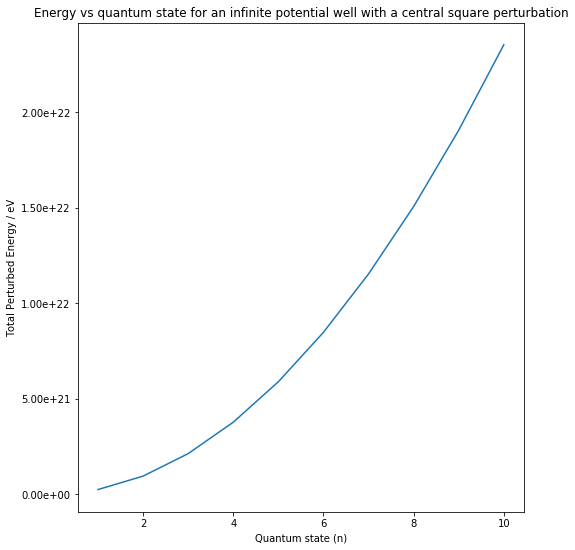

In [120]:
def energy_correc(w, V, n):
    """
    Function to calculate the total energy of the system with a square perturbation at the centre of an 
    infinite potential well
    
    Returns:
        new_E : float
                the corrected total energy
    Parameters:
        w : float
            width of the square perturbation
            
        Vmax : float
               the maximum square perturbation. first order energy corrections will be calculated up to
               this magnitude
               
        n : integer
            the principle quantum number
        """
    
    new_E = (energy(n) / e) + firstperturb(w, V, n)
    return new_E

def energy_correc_spectrum(w, V, nmax):
    """
    Function to find total perturbed energy of the system for various quantum states
    
    Returns:
        new_E : array
            the energies of systems up to the quantum state nmax
    
    Parameters:
        w : float
            width of the square perturbation
            
        Vmax : float
               the maximum square perturbation. first order energy corrections will be calculated up to
               this magnitude
               
        n : integer
            the principle quantum number
            
        nmax : integer
               the highest quantum state. energies will be calculated up to this quantum state
    """
    
    new_E = []
    
    for i in range(1, nmax + 1):
        new_E = np.append(new_E, energy_correc(w, V, i))
    
    return new_E

def plot_energy_correc(w, V, nmax):
    """
    Function to plot total perturbed energy against the quantum state
    
    Returns:
        a plot of energy against quantum state
        
    Parameters:
        w : float
            width of the square perturbation
            
        Vmax : float
               the maximum square perturbation. first order energy corrections will be calculated up to
               this magnitude
               
        n : integer
            the principle quantum number
            
        nmax : integer
               the highest quantum state. energies will be calculated up to this quantum state
    """
    
    n = np.linspace(1, nmax, nmax) #array filled with quantum states
    
    #set the size of the figures
    fig = plt.figure(figsize = (8, 9))
    
    ax = fig.add_subplot(111)
     
    #general plot formatting
    ax.plot(n, energy_correc_spectrum(w, V, nmax) / e)
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
    
    plt.xlabel('Quantum state (n)')
    plt.ylabel('Total Perturbed Energy / eV')
    plt.title('Energy vs quantum state for an infinite potential well with a central square perturbation')
    return plt.show()


plot_energy_correc(w, e, 10)

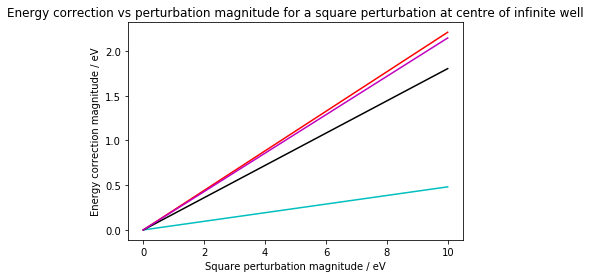

In [105]:
Vmax = 10 * e
delta_V = np.linspace(0, Vmax, 100)

plt.plot(delta_V / e, delta_E(w, Vmax, 2), color = 'c')
plt.plot(delta_V / e, delta_E(w, Vmax, 13), color = 'r')
plt.plot(delta_V / e, delta_E(w, Vmax, 17), color = 'k')
plt.plot(delta_V / e, delta_E(w, Vmax, 18), color = 'm')
plt.xlabel('Square perturbation magnitude / eV')
plt.ylabel('Energy correction magnitude / eV')
plt.title('Energy correction vs perturbation magnitude for a square perturbation at centre of infinite well')
plt.show()

In [98]:
def gradient(w, Vmax, nmax):
    """
    Function to find the gradient of plots of 'Energy correction magntiude vs Square perturbation magnitude'
    for a range of quantum states.
    
    Returns:
        grad : array
               gradients of plots of 'Energy correction magntiude vs Square perturbation magnitude'
               for a range of quantum states
               
    Parameters:
        w : float
            width of the square perturbation
        
        Vmax : float
               the maximum square perturbation. first order energy corrections will be calculated up to
               this magnitude
               
        nmax : integer
               the highest quantum state. gradients will be calculated up to this quantum state
    """
    grad = []
    
    for i in range(1, nmax + 1):
        delta = delta_E(w, Vmax, i)
        last = len(delta) - 1
        
        grad = np.append(grad, (delta[last] - delta[0]) / (Vmax / e))
    
    return grad

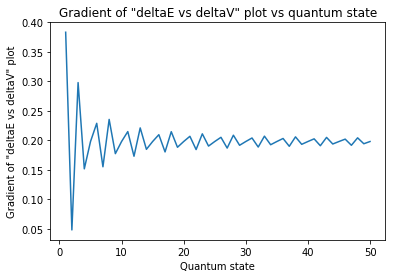

In [106]:
nmax = 50
n = np.linspace(1, nmax, nmax)

plt.plot(n, gradient(w, Vmax, nmax))
plt.xlabel('Quantum state')
plt.ylabel('Gradient of "deltaE vs deltaV" plot')
plt.title('Gradient of "deltaE vs deltaV" plot vs quantum state')
plt.show()